### Multilayer perceptron

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [67]:
# SMOTE balancing technique is applied
from imblearn.over_sampling import SMOTE
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [68]:
from tensorflow.keras.layers import PReLU

In [69]:
from tensorflow.keras.layers import Dense,Input,Activation,Dropout
from tensorflow.keras import Model
from tensorflow.keras import Sequential
import random as rn
from sklearn.metrics import roc_auc_score, precision_score, recall_score
import datetime

In [111]:
num_classes = 2

In [104]:
# Read the dataset
data = pd.read_csv("./data_top25_dfeatures.csv")


In [105]:
data['readmitted'].value_counts()

0    88026
1    11314
Name: readmitted, dtype: int64

In [106]:
# get the predictors and target variable from dataset
X = data.drop('readmitted', axis=1)
y = data['readmitted']
oversample = SMOTE(sampling_strategy=0.8)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, stratify=y)

In [107]:
X_train.shape

(79472, 25)

In [108]:
y_train.value_counts()

0    70421
1     9051
Name: readmitted, dtype: int64

In [109]:

X_train, y_train = oversample.fit_resample(X_train, y_train)

In [110]:
X_train.shape

(126757, 25)

In [111]:
y_train.value_counts()

0    70421
1    56336
Name: readmitted, dtype: int64

In [112]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, name='Adam')
def create_model6():
    initializer = tf.keras.initializers.he_uniform(seed=15)
    
    model = Sequential([
        Input(shape=(25,), name='input_layer'),
        Dense(64, kernel_initializer=initializer, name='dense_layer1'),
        PReLU(),
        Dropout(rate=0.15, name='drop_out1'),
        Dense(1, activation='sigmoid', kernel_initializer=initializer, name='output_layer'),
        
    ])
    return model

In [56]:
model6 = create_model6()
model6.compile(optimizer=optimizer,
              loss='mse',
              metrics=['accuracy'])
model6.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 64)                1664      
_________________________________________________________________
p_re_lu_3 (PReLU)            (None, 64)                64        
_________________________________________________________________
drop_out1 (Dropout)          (None, 64)                0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 1,793
Trainable params: 1,793
Non-trainable params: 0
_________________________________________________________________


In [57]:
model6.fit(X_train, y_train, epochs=25, validation_data=(X_test,y_test),
           batch_size=50)

Epoch 1/25
2536/2536 [==============================] - 2s 822us/step - loss: 0.2779 - accuracy: 0.6595 - val_loss: 0.1554 - val_accuracy: 0.7937
Epoch 2/25
2536/2536 [==============================] - 2s 798us/step - loss: 0.1976 - accuracy: 0.6990 - val_loss: 0.2459 - val_accuracy: 0.6244
Epoch 3/25
2536/2536 [==============================] - 2s 802us/step - loss: 0.1962 - accuracy: 0.7002 - val_loss: 0.1829 - val_accuracy: 0.7362
Epoch 4/25
2536/2536 [==============================] - 2s 801us/step - loss: 0.1960 - accuracy: 0.7015 - val_loss: 0.1977 - val_accuracy: 0.7143
Epoch 5/25
2536/2536 [==============================] - 2s 803us/step - loss: 0.1951 - accuracy: 0.7035 - val_loss: 0.2110 - val_accuracy: 0.6874
Epoch 6/25
2536/2536 [==============================] - 2s 805us/step - loss: 0.1939 - accuracy: 0.7063 - val_loss: 0.2084 - val_accuracy: 0.6718
Epoch 7/25
2536/2536 [==============================] - 2s 807us/step - loss: 0.1937 - accuracy: 0.7066 - val_loss: 0.1570 -

In [58]:
model6.save("./mlp_25_dfeatures")

INFO:tensorflow:Assets written to: ./mlp_25_dfeatures/assets


In [59]:
model6.save("mlp_h5_dfeatures.h5")

In [60]:
# serialize model to JSON
model_json = model6.to_json()
with open("mlp_25dfeatures.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model6.save_weights("mlp_weights_dfeatures.h5")
print("Saved model to disk")

Saved model to disk


In [61]:
loss = model6.history.history['loss']
val_loss = model6.history.history['val_loss']
accuracy = model6.history.history['accuracy']
val_accuracy = model6.history.history['val_accuracy']
loss, val_loss, accuracy, val_accuracy

([0.277890145778656,
  0.19763892889022827,
  0.1962454915046692,
  0.1960199922323227,
  0.1950959712266922,
  0.19390852749347687,
  0.19371747970581055,
  0.19292332231998444,
  0.1932739019393921,
  0.1929294914007187,
  0.19219611585140228,
  0.19198161363601685,
  0.19175955653190613,
  0.19184862077236176,
  0.19092203676700592,
  0.19121035933494568,
  0.19021038711071014,
  0.18909168243408203,
  0.18926137685775757,
  0.18929573893547058,
  0.1888267546892166,
  0.18885856866836548,
  0.18849144876003265,
  0.18818563222885132,
  0.1884160041809082],
 [0.15541422367095947,
  0.2458849549293518,
  0.18290317058563232,
  0.1976514458656311,
  0.21095995604991913,
  0.20836716890335083,
  0.15697959065437317,
  0.17161384224891663,
  0.18115389347076416,
  0.1661926656961441,
  0.18844282627105713,
  0.19935625791549683,
  0.2096678614616394,
  0.23010411858558655,
  0.1511056274175644,
  0.15685223042964935,
  0.17024369537830353,
  0.1655067801475525,
  0.20811712741851807,
  

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [63]:

# predict probabilities for test set
yhat_probs = model6.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model6.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.755285
Precision: 0.160616
Recall: 0.271763
F1 score: 0.201904
ROC AUC: 0.589824
[[14391  3214]
 [ 1648   615]]


In [64]:
from matplotlib import pyplot

In [43]:
model6.history

Train: 0.731, Test: 0.755


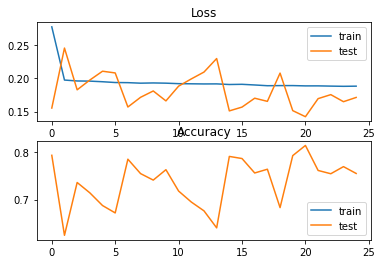

In [65]:
# evaluate the model
_, train_acc = model6.evaluate(X_train, y_train, verbose=0)
_, test_acc = model6.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(loss, label='train')
pyplot.plot(val_loss, label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(accuracy, label='train')
pyplot.plot(val_accuracy, label='test')
pyplot.legend()
pyplot.show()

In [91]:
model8 = create_model6()
model8.compile(optimizer=optimizer,
              loss='mse',
              metrics=['accuracy'])
model8.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 64)                1664      
_________________________________________________________________
p_re_lu_5 (PReLU)            (None, 64)                64        
_________________________________________________________________
drop_out1 (Dropout)          (None, 64)                0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 1,793
Trainable params: 1,793
Non-trainable params: 0
_________________________________________________________________


In [92]:
model8.fit(X_train, y_train, epochs=25, validation_data=(X_test,y_test),
           batch_size=64)

Epoch 1/25
1981/1981 [==============================] - 2s 871us/step - loss: 0.4436 - accuracy: 0.5561 - val_loss: 0.1151 - val_accuracy: 0.8848
Epoch 2/25
1981/1981 [==============================] - 2s 838us/step - loss: 0.4067 - accuracy: 0.5927 - val_loss: 0.1537 - val_accuracy: 0.8459
Epoch 3/25
1981/1981 [==============================] - 2s 833us/step - loss: 0.3850 - accuracy: 0.6144 - val_loss: 0.2345 - val_accuracy: 0.7648
Epoch 4/25
1981/1981 [==============================] - 2s 832us/step - loss: 0.3650 - accuracy: 0.6344 - val_loss: 0.1771 - val_accuracy: 0.8224
Epoch 5/25
1981/1981 [==============================] - 2s 819us/step - loss: 0.3585 - accuracy: 0.6408 - val_loss: 0.2488 - val_accuracy: 0.7508
Epoch 6/25
1981/1981 [==============================] - 2s 834us/step - loss: 0.3504 - accuracy: 0.6491 - val_loss: 0.3189 - val_accuracy: 0.6803
Epoch 7/25
1981/1981 [==============================] - 2s 835us/step - loss: 0.3518 - accuracy: 0.6478 - val_loss: 0.2005 -

In [93]:
loss = model8.history.history['loss']
val_loss = model8.history.history['val_loss']
accuracy = model8.history.history['accuracy']
val_accuracy = model8.history.history['val_accuracy']
loss, val_loss, accuracy, val_accuracy

([0.44358834624290466,
  0.4066752791404724,
  0.3849918842315674,
  0.36499732732772827,
  0.3585367798805237,
  0.3504083454608917,
  0.3518090546131134,
  0.34394901990890503,
  0.3453209102153778,
  0.3331991732120514,
  0.3376365303993225,
  0.33368274569511414,
  0.3428283929824829,
  0.3563927710056305,
  0.3744959831237793,
  0.3352631628513336,
  0.35398539900779724,
  0.3483028709888458,
  0.3322781026363373,
  0.35940003395080566,
  0.3386375904083252,
  0.33365556597709656,
  0.37074849009513855,
  0.336948961019516,
  0.35515904426574707],
 [0.11512742191553116,
  0.15365944802761078,
  0.23453813791275024,
  0.17712463438510895,
  0.24884632229804993,
  0.31887543201446533,
  0.20048749446868896,
  0.4812283515930176,
  0.2351050078868866,
  0.1950278878211975,
  0.48175492882728577,
  0.16305264830589294,
  0.1910238116979599,
  0.4245525896549225,
  0.14359557628631592,
  0.3273911774158478,
  0.27704986929893494,
  0.24185341596603394,
  0.24507930874824524,
  0.131216

In [94]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# predict probabilities for test set
yhat_probs = model8.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model8.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.415694
Precision: 0.132163
Recall: 0.741935
F1 score: 0.224360
ROC AUC: 0.558452
[[ 6580 11025]
 [  584  1679]]


Train: 0.605, Test: 0.416


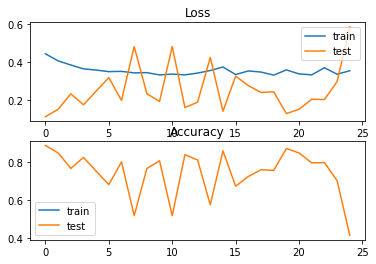

In [95]:
# evaluate the model
_, train_acc = model8.evaluate(X_train, y_train, verbose=0)
_, test_acc = model8.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(loss, label='train')
pyplot.plot(val_loss, label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(accuracy, label='train')
pyplot.plot(val_accuracy, label='test')
pyplot.legend()
pyplot.show()

In [113]:
model9 = create_model6()
model9.compile(optimizer=optimizer,
              loss='mse',
              metrics=['accuracy'])
model9.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 64)                1664      
_________________________________________________________________
p_re_lu_7 (PReLU)            (None, 64)                64        
_________________________________________________________________
drop_out1 (Dropout)          (None, 64)                0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 1,793
Trainable params: 1,793
Non-trainable params: 0
_________________________________________________________________


In [121]:
model9.fit(X_train, y_train, epochs=200, validation_data=(X_test,y_test),
           batch_size=64)

Epoch 1/200
1981/1981 [==============================] - 2s 831us/step - loss: 0.3415 - accuracy: 0.6585 - val_loss: 0.3412 - val_accuracy: 0.6588
Epoch 2/200
1981/1981 [==============================] - 2s 838us/step - loss: 0.3332 - accuracy: 0.6668 - val_loss: 0.1905 - val_accuracy: 0.8095
Epoch 3/200
1981/1981 [==============================] - 2s 833us/step - loss: 0.3418 - accuracy: 0.6582 - val_loss: 0.5498 - val_accuracy: 0.4502
Epoch 4/200
1981/1981 [==============================] - 2s 832us/step - loss: 0.3561 - accuracy: 0.6439 - val_loss: 0.4618 - val_accuracy: 0.5382
Epoch 5/200
1981/1981 [==============================] - 2s 829us/step - loss: 0.3598 - accuracy: 0.6402 - val_loss: 0.5043 - val_accuracy: 0.4957
Epoch 6/200
1981/1981 [==============================] - 2s 828us/step - loss: 0.3448 - accuracy: 0.6552 - val_loss: 0.1394 - val_accuracy: 0.8606
Epoch 7/200
1981/1981 [==============================] - 2s 843us/step - loss: 0.3582 - accuracy: 0.6418 - val_loss: 0

1981/1981 [==============================] - 2s 838us/step - loss: 0.3457 - accuracy: 0.6543 - val_loss: 0.1634 - val_accuracy: 0.8366
Epoch 112/200
1981/1981 [==============================] - 2s 838us/step - loss: 0.3613 - accuracy: 0.6387 - val_loss: 0.1311 - val_accuracy: 0.8689
Epoch 113/200
1981/1981 [==============================] - 2s 840us/step - loss: 0.3525 - accuracy: 0.6475 - val_loss: 0.1891 - val_accuracy: 0.8109
Epoch 114/200
1981/1981 [==============================] - 2s 841us/step - loss: 0.3626 - accuracy: 0.6374 - val_loss: 0.1682 - val_accuracy: 0.8318
Epoch 115/200
1981/1981 [==============================] - 2s 847us/step - loss: 0.3329 - accuracy: 0.6671 - val_loss: 0.2274 - val_accuracy: 0.7726
Epoch 116/200
1981/1981 [==============================] - 2s 850us/step - loss: 0.3224 - accuracy: 0.6776 - val_loss: 0.2525 - val_accuracy: 0.7475
Epoch 117/200
1981/1981 [==============================] - 2s 849us/step - loss: 0.3443 - accuracy: 0.6557 - val_loss: 0

1981/1981 [==============================] - 2s 828us/step - loss: 0.3194 - accuracy: 0.6806 - val_loss: 0.2596 - val_accuracy: 0.7404
Epoch 167/200
1981/1981 [==============================] - 2s 828us/step - loss: 0.3209 - accuracy: 0.6790 - val_loss: 0.2447 - val_accuracy: 0.7553
Epoch 168/200
1981/1981 [==============================] - 2s 832us/step - loss: 0.3247 - accuracy: 0.6753 - val_loss: 0.4095 - val_accuracy: 0.5905
Epoch 169/200
1981/1981 [==============================] - 2s 823us/step - loss: 0.3296 - accuracy: 0.6704 - val_loss: 0.4282 - val_accuracy: 0.5718
Epoch 170/200
1981/1981 [==============================] - 2s 828us/step - loss: 0.3463 - accuracy: 0.6537 - val_loss: 0.5528 - val_accuracy: 0.4472
Epoch 171/200
1981/1981 [==============================] - 2s 832us/step - loss: 0.3561 - accuracy: 0.6439 - val_loss: 0.2429 - val_accuracy: 0.7571
Epoch 172/200
1981/1981 [==============================] - 2s 827us/step - loss: 0.3299 - accuracy: 0.6701 - val_loss: 0

In [122]:
loss = model9.history.history['loss']
val_loss = model9.history.history['val_loss']
accuracy = model9.history.history['accuracy']
val_accuracy = model9.history.history['val_accuracy']
loss, val_loss, accuracy, val_accuracy

([0.34151196479797363,
  0.33323678374290466,
  0.3417992889881134,
  0.35606449842453003,
  0.35977494716644287,
  0.34479114413261414,
  0.3582289516925812,
  0.33644187450408936,
  0.3592361807823181,
  0.33060896396636963,
  0.37341469526290894,
  0.41557779908180237,
  0.38149264454841614,
  0.3270161747932434,
  0.32790476083755493,
  0.33335405588150024,
  0.3425571024417877,
  0.3631753921508789,
  0.382400780916214,
  0.36217352747917175,
  0.381435751914978,
  0.34648147225379944,
  0.3404384255409241,
  0.3275220990180969,
  0.37214818596839905,
  0.3532954156398773,
  0.3424547016620636,
  0.3459101915359497,
  0.36069318652153015,
  0.41571998596191406,
  0.4197006821632385,
  0.4197006821632385,
  0.3703835904598236,
  0.3408869504928589,
  0.3303462266921997,
  0.33598145842552185,
  0.32592570781707764,
  0.33646443486213684,
  0.3574947118759155,
  0.3517659902572632,
  0.3273024559020996,
  0.36182817816734314,
  0.3810235261917114,
  0.39691492915153503,
  0.35485100

Train: 0.574, Test: 0.351


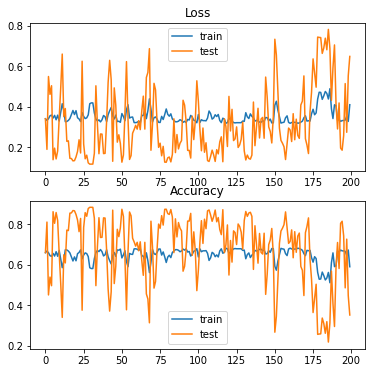

In [123]:
# evaluate the model
_, train_acc = model9.evaluate(X_train, y_train, verbose=0)
_, test_acc = model9.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.figure(figsize=(6, 6))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(loss, label='train')
pyplot.plot(val_loss, label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(accuracy, label='train')
pyplot.plot(val_accuracy, label='test')
pyplot.legend()
pyplot.show()

In [124]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# predict probabilities for test set
yhat_probs = model9.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model9.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.351168
Precision: 0.127035
Recall: 0.799823
F1 score: 0.219248
ROC AUC: 0.546620
[[ 5167 12438]
 [  453  1810]]


In [79]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, name='Adam')
def create_model7():
    initializer = tf.keras.initializers.he_uniform(seed=15)
    
    model = Sequential([
        Input(shape=(25,), name='input_layer'),
        Dense(64, kernel_initializer=initializer, name='dense_layer1'),
        PReLU(),
        #Dropout(rate=0.15, name='drop_out1'),
        Dense(1, activation='sigmoid', kernel_initializer=initializer, name='output_layer'),
        
    ])
    return model

In [80]:
model7 = create_model7()
model7.compile(optimizer=optimizer,
              loss='mse',
              metrics=['accuracy'])
model7.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 64)                1664      
_________________________________________________________________
p_re_lu_4 (PReLU)            (None, 64)                64        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 1,793
Trainable params: 1,793
Non-trainable params: 0
_________________________________________________________________


In [81]:
model7.fit(X_train, y_train, epochs=30, validation_data=(X_test,y_test),
           batch_size=50)

Epoch 1/30
2536/2536 [==============================] - 2s 792us/step - loss: 0.4761 - accuracy: 0.5239 - val_loss: 0.8813 - val_accuracy: 0.1187
Epoch 2/30
2536/2536 [==============================] - 2s 757us/step - loss: 0.4634 - accuracy: 0.5365 - val_loss: 0.1139 - val_accuracy: 0.8861
Epoch 3/30
2536/2536 [==============================] - 2s 747us/step - loss: 0.4444 - accuracy: 0.5556 - val_loss: 0.1139 - val_accuracy: 0.8861
Epoch 4/30
2536/2536 [==============================] - 2s 748us/step - loss: 0.4444 - accuracy: 0.5556 - val_loss: 0.1139 - val_accuracy: 0.8861
Epoch 5/30
2536/2536 [==============================] - 2s 746us/step - loss: 0.4444 - accuracy: 0.5556 - val_loss: 0.1139 - val_accuracy: 0.8861
Epoch 6/30
2536/2536 [==============================] - 2s 757us/step - loss: 0.4444 - accuracy: 0.5556 - val_loss: 0.1139 - val_accuracy: 0.8861
Epoch 7/30
2536/2536 [==============================] - 2s 749us/step - loss: 0.4444 - accuracy: 0.5556 - val_loss: 0.1139 -

In [82]:
model7.save('./mlp_without_dropout')

INFO:tensorflow:Assets written to: ./mlp_without_dropout/assets


In [83]:
loss = model7.history.history['loss']
val_loss = model7.history.history['val_loss']
accuracy = model7.history.history['accuracy']
val_accuracy = model7.history.history['val_accuracy']
loss, val_loss, accuracy, val_accuracy

([0.4761092960834503,
  0.4634228050708771,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185],
 [0.8812846541404724,
  0.11390174925327301,
  0.11390174925327301,
  0.11390174925327301,
  0.11390174925327301,
  0.11390174925327301,
  0.11390174925327301,
  0.11390174925327301,
  0.11390174925327301,
  0.11390174925327301,
  0.11390174925327301,
  0.11390174925327301,
  0.11390174925327301,
  0.113901749

In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# predict probabilities for test set
yhat_probs = model7.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model7.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.886098
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000
ROC AUC: 0.500000
[[17605     0]
 [ 2263     0]]


/Users/sbellati/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, name='Adam')
def create_model10():
    initializer = tf.keras.initializers.he_uniform(seed=15)
    
    model = Sequential([
        Input(shape=(25,), name='input_layer'),
        Dense(64, kernel_initializer=initializer, name='dense_layer1'),
        PReLU(),
        Dropout(rate=0.15, name='drop_out1'),
        Dense(1, activation='sigmoid', kernel_initializer=initializer, name='output_layer'),
        
    ])
    return model

In [126]:
model10 = create_model10()
model10.compile(optimizer=optimizer,
              loss='mse',
              metrics=['accuracy'])
model10.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 64)                1664      
_________________________________________________________________
p_re_lu_8 (PReLU)            (None, 64)                64        
_________________________________________________________________
drop_out1 (Dropout)          (None, 64)                0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 1,793
Trainable params: 1,793
Non-trainable params: 0
_________________________________________________________________


In [127]:
model10.fit(X_train, y_train, epochs=200, validation_data=(X_test,y_test),
           batch_size=16)

Epoch 1/200
7923/7923 [==============================] - 6s 769us/step - loss: 0.4791 - accuracy: 0.5208 - val_loss: 0.8771 - val_accuracy: 0.1228
Epoch 2/200
7923/7923 [==============================] - 6s 765us/step - loss: 0.4532 - accuracy: 0.5467 - val_loss: 0.1140 - val_accuracy: 0.8860
Epoch 3/200
7923/7923 [==============================] - 6s 761us/step - loss: 0.4331 - accuracy: 0.5668 - val_loss: 0.1311 - val_accuracy: 0.8688
Epoch 4/200
7923/7923 [==============================] - 6s 766us/step - loss: 0.4160 - accuracy: 0.5839 - val_loss: 0.1242 - val_accuracy: 0.8758
Epoch 5/200
7923/7923 [==============================] - 6s 774us/step - loss: 0.4099 - accuracy: 0.5900 - val_loss: 0.1985 - val_accuracy: 0.8014
Epoch 6/200
7923/7923 [==============================] - 6s 793us/step - loss: 0.4258 - accuracy: 0.5741 - val_loss: 0.6980 - val_accuracy: 0.3018
Epoch 7/200
7923/7923 [==============================] - 6s 768us/step - loss: 0.4072 - accuracy: 0.5928 - val_loss: 0

7923/7923 [==============================] - 6s 780us/step - loss: 0.3723 - accuracy: 0.6277 - val_loss: 0.4724 - val_accuracy: 0.5276
Epoch 112/200
7923/7923 [==============================] - 6s 775us/step - loss: 0.3812 - accuracy: 0.6188 - val_loss: 0.1468 - val_accuracy: 0.8532
Epoch 113/200
7923/7923 [==============================] - 6s 776us/step - loss: 0.3824 - accuracy: 0.6176 - val_loss: 0.3922 - val_accuracy: 0.6078
Epoch 114/200
7923/7923 [==============================] - 6s 785us/step - loss: 0.3883 - accuracy: 0.6117 - val_loss: 0.5308 - val_accuracy: 0.4691
Epoch 115/200
7923/7923 [==============================] - 6s 786us/step - loss: 0.3713 - accuracy: 0.6287 - val_loss: 0.3045 - val_accuracy: 0.6955
Epoch 116/200
7923/7923 [==============================] - 6s 777us/step - loss: 0.3880 - accuracy: 0.6120 - val_loss: 0.4988 - val_accuracy: 0.5012
Epoch 117/200
7923/7923 [==============================] - 6s 780us/step - loss: 0.3883 - accuracy: 0.6117 - val_loss: 0

7923/7923 [==============================] - 6s 710us/step - loss: 0.3806 - accuracy: 0.6194 - val_loss: 0.1392 - val_accuracy: 0.8608
Epoch 167/200
7923/7923 [==============================] - 6s 705us/step - loss: 0.3887 - accuracy: 0.6113 - val_loss: 0.2196 - val_accuracy: 0.7804
Epoch 168/200
7923/7923 [==============================] - 6s 708us/step - loss: 0.3642 - accuracy: 0.6358 - val_loss: 0.1923 - val_accuracy: 0.8077
Epoch 169/200
7923/7923 [==============================] - 6s 719us/step - loss: 0.3930 - accuracy: 0.6070 - val_loss: 0.1395 - val_accuracy: 0.8605
Epoch 170/200
7923/7923 [==============================] - 6s 714us/step - loss: 0.3857 - accuracy: 0.6143 - val_loss: 0.1591 - val_accuracy: 0.8409
Epoch 171/200
7923/7923 [==============================] - 6s 722us/step - loss: 0.3729 - accuracy: 0.6271 - val_loss: 0.2056 - val_accuracy: 0.7944
Epoch 172/200
7923/7923 [==============================] - 6s 721us/step - loss: 0.3686 - accuracy: 0.6314 - val_loss: 0

In [128]:
loss = model10.history.history['loss']
val_loss = model10.history.history['val_loss']
accuracy = model10.history.history['accuracy']
val_accuracy = model10.history.history['val_accuracy']
loss, val_loss, accuracy, val_accuracy

([0.47911036014556885,
  0.4532428979873657,
  0.43314602971076965,
  0.415973424911499,
  0.4098532795906067,
  0.4257941246032715,
  0.4071613848209381,
  0.4032553434371948,
  0.4050110876560211,
  0.44126901030540466,
  0.4438703954219818,
  0.4444488286972046,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.44444093108177185,
  0.4444488286972046,
  0.44444093108177185,
  0.44444093108177185,
  0.44247421622276306,
  0.4429813027381897,
  0.44434627890586853,
  0.444417268037796,
  0.44438570737838745,
  0.4443620443344116,
  0.4443383812904358,
  0.4431508481502533,
  0.4426027834415436,
  0.4416952133178711,
  0.43069255352020264,
  0.397998571395874,
  0.39973053336143494,
  0.4199720025062561,
  0.4384337067604065,
  0.39867568016052246,
  0.39211317896842957,
  0.39775359630584717,
  0.4024830162525177,
  0.39862704277038574,
  0.42112821340560913,
  0.40640416741371155,
  0.3878149092197418,
  0.396631628

Train: 0.643, Test: 0.703


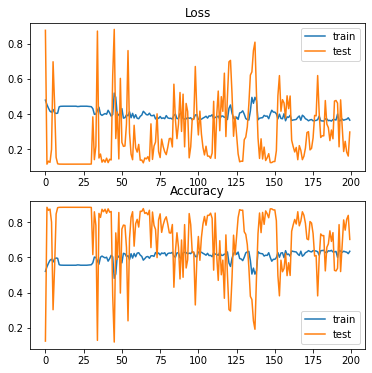

In [129]:
# evaluate the model
_, train_acc = model10.evaluate(X_train, y_train, verbose=0)
_, test_acc = model10.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.figure(figsize=(6, 6))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(loss, label='train')
pyplot.plot(val_loss, label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(accuracy, label='train')
pyplot.plot(val_accuracy, label='test')
pyplot.legend()
pyplot.show()

In [130]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# predict probabilities for test set
yhat_probs = model10.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model10.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.702788
Precision: 0.179175
Recall: 0.449403
F1 score: 0.256204
ROC AUC: 0.592513
[[12946  4659]
 [ 1246  1017]]
